# Linear Regression & Gradient Descent

_In this notebook we will:_
1. Review the model, loss & cost functions for simple linear regression.  
2. Implement **Gradient Descent** from scratch and visualize how the line converges.  
3. Experiment with learning rate and see oscillations or divergence.  
4. Apply to a small **day-ahead market** price forecast using demand as feature.  
5. Compare our implementation to `sklearn.linear_model.LinearRegression`.  
6. Introduce **MAE** and **RMSE** and compare single vs. multiple regression.
7. Practice with multiple linear regression using additional features.

---

## 1. Model, Loss & Cost Review

We assume a model with a single feature $x$:

$$
\hat y^{(i)} = \beta_0 + \beta_1\,x^{(i)}
$$

The **loss** for one sample is the squared error:

$$
L^{(i)} = \bigl(y^{(i)} - \hat y^{(i)}\bigr)^2
               = \bigl(y^{(i)} - (\beta_0 + \beta_1\,x^{(i)})\bigr)^2
$$

The **cost** (MSE) over $m$ samples is:

$$
J(\beta_0,\beta_1)
= \frac{1}{m}\sum_{i=1}^m \bigl(y^{(i)} - (\beta_0 + \beta_1\,x^{(i)})\bigr)^2
$$

---

## 2. Gradient Descent Derivation

We update each parameter by moving **against** the gradient of $J$:

$$
\beta_j \;\leftarrow\; \beta_j
                - \alpha \;\frac{\partial J}{\partial \beta_j}
\,,\quad j=0,1
$$

Compute partial derivatives:

$$
\frac{\partial J}{\partial \beta_0}
= -\frac{2}{m}\sum_{i=1}^m \bigl(y^{(i)} - (\beta_0 + \beta_1 x^{(i)})\bigr)
$$

$$
\frac{\partial J}{\partial \beta_1}
= -\frac{2}{m}\sum_{i=1}^m \bigl(y^{(i)} - (\beta_0 + \beta_1 x^{(i)})\bigr)\,x^{(i)}
$$

Thus the updates become:

$$
\begin{aligned}
\beta_0 &\leftarrow \beta_0
              + \frac{2\alpha}{m}\sum_{i=1}^m \bigl(y^{(i)} - (\beta_0 + \beta_1 x^{(i)})\bigr),\\
\beta_1 &\leftarrow \beta_1
              + \frac{2\alpha}{m}\sum_{i=1}^m \bigl(y^{(i)} - (\beta_0 + \beta_1 x^{(i)})\bigr)\,x^{(i)}.
\end{aligned}
$$

---

## 3. Implementing Gradient Descent

First, we import all the libraries we will use in this notebook. These include:
- `numpy` for numerical operations
- `pandas` for data manipulation
- `matplotlib` for plotting

In [ ]:
import numpy as np # for numerical operations
import matplotlib.pyplot as plt # for plotting
import pandas as pd # for data manipulation

# import also ipython widgets for interactive plotting
from ipywidgets import interact, FloatLogSlider

import os # to handle file paths
import urllib.request # to download files

In [2]:
# 3.1 Generate synthetic data
# Set random seed for reproducibility
np.random.seed(0)

# Generate temperature data (feature) between -10 and 35 degrees
temperature = np.random.uniform(-10, 35, size=50)

# Generate energy demand (target) with relationship: demand = 250 - 3*temperature + noise
# This simulates the inverse relationship between temperature and energy demand
energy_demand = 250 - 3*temperature + np.random.normal(0, 10, size=temperature.shape)

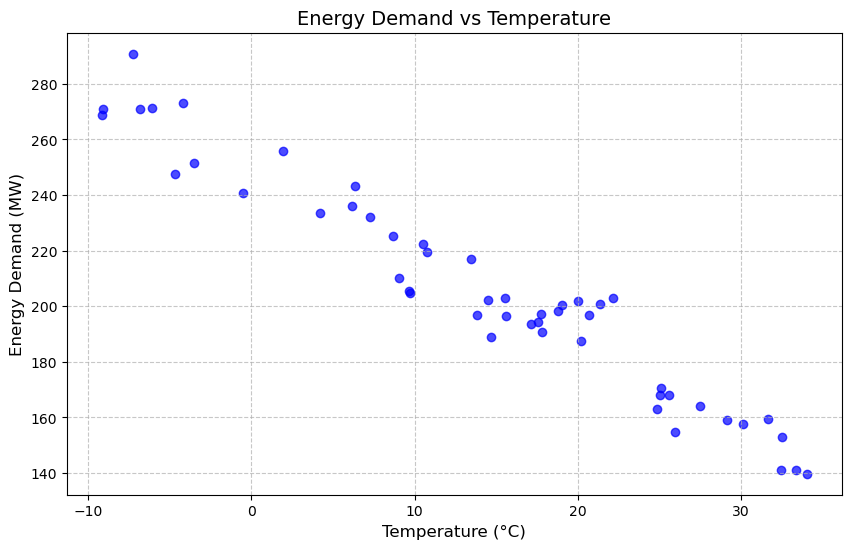

Data summary:
Number of samples: 50
Temperature range: -9.2°C to 34.0°C
Energy demand range: 139.8 MW to 290.8 MW


In [3]:
# 3.2 Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(temperature, energy_demand, color='blue', alpha=0.7)
plt.title('Energy Demand vs Temperature', fontsize=14)
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Energy Demand (MW)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Print a brief description of the data
print(f"Data summary:")
print(f"Number of samples: {len(temperature)}")
print(f"Temperature range: {temperature.min():.1f}°C to {temperature.max():.1f}°C")
print(f"Energy demand range: {energy_demand.min():.1f} MW to {energy_demand.max():.1f} MW")

In [4]:
# 3.3 Define prediction function
def predict(X, intercept, slope):
    """Calculate predicted values using linear model.

    Args:
        X: Feature values (temperature)
        intercept: The y-intercept (beta0)
        slope: The slope coefficient (beta1)

    Returns:
        Predicted values based on linear equation: intercept + slope * X
    """
    return intercept + slope * X

# 3.4 Compute Mean Squared Error (MSE) cost function
def compute_cost(X, y_true, intercept, slope):
    """Calculate the Mean Squared Error cost.

    Args:
        X: Feature values (temperature)
        y_true: Actual target values (energy demand)
        intercept: The y-intercept (beta0)
        slope: The slope coefficient (beta1)

    Returns:
        Mean Squared Error cost value
    """
    m = len(y_true)  # Number of samples
    y_pred = predict(X, intercept, slope)  # Get predictions
    squared_errors = (y_true - y_pred)**2  # Calculate squared errors
    return np.sum(squared_errors) / m  # Return mean squared error

### Exercise 1: Implement Gradient Descent for Linear Regression

In this exercise, you will fill in the core functions that power gradient descent and then test your implementation on the synthetic temperature–demand dataset.

**Your tasks:**

1. **Complete** the `compute_gradients(X, y_true, intercept, slope)` function:
   - Compute the vector of predictions `y_pred = intercept + slope * X`.
   - Calculate the error `error = y_true - y_pred`.
   - Return the two partial derivatives as described above

2. **Complete** the `gradient_descent(X, y_true, learning_rate, num_iterations)` function:
   - Initialize `intercept = 0.0` and `slope = 0.0`.
   - For each iteration:
     1. Call your `compute_gradients(...)` to get `grad_intercept` and `grad_slope`.
     2. Update the parameters:  
        ```python
        intercept -= learning_rate * grad_intercept
        slope     -= learning_rate * grad_slope
        ```
     3. Store the current `intercept`, `slope`, and `compute_cost(...)` in a history dictionary for later plotting.

3. **Run** your gradient descent on the provided synthetic data:
   ```python
   learning_rate = 0.002
   iterations    = 5000

   intercept_gd, slope_gd, history = gradient_descent(temperature, energy_demand,
                                                      learning_rate, iterations)

4. **Visualize**:

   * Plot the cost (MSE) vs. iteration number to verify that it’s decreasing smoothly.
   * Overlay the initial line (iteration 0) and your final fitted line on the scatter of `(temperature, energy_demand)`.

---

**Hints:**

* Use the formulas from Section 2 for the partial derivatives.
* Make sure your history dictionary keys are exactly `['intercept', 'slope', 'cost']`.
* If the cost increases or oscillates, try reducing `learning_rate` by an order of magnitude.


In [5]:
def compute_gradients(X, y_true, intercept, slope):
    m = len(y_true)
    y_pred = predict(X, intercept, slope)
    error = y_true - y_pred
    
    # Using the derived formulas
    grad_intercept = -2/m * np.sum(error)
    grad_slope = -2/m * np.sum(error * X)
    
    return grad_intercept, grad_slope

# Solution for gradient_descent
def gradient_descent(X, y_true, learning_rate, num_iterations):
    intercept, slope = 0.0, 0.0
    history = {'intercept':[], 'slope':[], 'cost':[]}
    
    for i in range(num_iterations):
        # Calculate gradients
        grad_intercept, grad_slope = compute_gradients(X, y_true, intercept, slope)
        
        # Update parameters (moving opposite to gradient direction)
        intercept -= learning_rate * grad_intercept
        slope -= learning_rate * grad_slope
        
        # Record history for visualization
        history['intercept'].append(intercept)
        history['slope'].append(slope)
        history['cost'].append(compute_cost(X, y_true, intercept, slope))
    
    return intercept, slope, history

Run the following cell to test your implementation. It will generate a synthetic dataset and run your gradient descent implementation. If everything is correct, you will se a massege indicating that all checks passed.

In [6]:
def test_compute_gradients_and_gd():
    X_test = np.array([0, 1, 2, 3, 4])
    y_test = np.array([1, 3, 5, 7, 9])  # True model: y = 2x + 1

    # Check gradients at intercept=0.0, slope=0.0
    grad_intercept, grad_slope = compute_gradients(X_test, y_test, intercept=0.0, slope=0.0)
    assert np.isclose(grad_intercept, -10.0), f"Expected grad_intercept -10.0, got {grad_intercept}"
    assert np.isclose(grad_slope, -28.0), f"Expected grad_slope -28.0, got {grad_slope}"

    # Check convergence of gradient descent
    intercept, slope, history = gradient_descent(X_test, y_test, learning_rate=0.01, num_iterations=1000)
    assert np.isclose(intercept, 1.0, atol=0.1), f"Expected intercept ≈ 1.0, got {intercept}"
    assert np.isclose(slope, 2.0, atol=0.1), f"Expected slope ≈ 2.0, got {slope}"

    print("✅ All gradient checks passed!")

# Run the test
test_compute_gradients_and_gd()

✅ All gradient checks passed!


---

## 4. Visualizing Convergence

### Experiment: Tuning the Learning Rate with a Slider

Gradient descent performance depends heavily on the choice of learning rate (`α`). If it's too small, convergence is slow; if it's too large, the algorithm may diverge or oscillate.

In the interactive plot below, you can adjust the learning rate using a log-scale slider and observe how it affects:

- The **speed and stability** of convergence,
- The **final cost value** after training,
- Whether the model converges at all.

Use this to build intuition for how sensitive gradient-based optimization is to hyperparameters.

In [7]:
def run_and_plot(learning_rate=0.002):
    iterations = 10000
    
    intercept, slope, history = gradient_descent(temperature, energy_demand, learning_rate, iterations)
    
    plt.figure(figsize=(10, 5))
    plt.plot(range(iterations), history['cost'], color='blue')
    plt.title(f'Cost Convergence (learning_rate={learning_rate})', fontsize=14)
    plt.xlabel('Iteration', fontsize=12)
    plt.ylabel('Cost (MSE)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

    print(f"Intercept (β₀): {intercept:.2f}")
    print(f"Slope (β₁): {slope:.2f}")
    print(f"Final Cost: {history['cost'][-1]:.2f}")

# Use a log-scale slider for better control
interact(run_and_plot, learning_rate=FloatLogSlider(value=0.002, base=10, min=-5, max=-1, step=0.1, description='Learning rate'))

interactive(children=(FloatLogSlider(value=0.002, description='Learning rate', max=-1.0, min=-5.0), Output()),…

<function __main__.run_and_plot(learning_rate=0.002)>

Now when you found a good learning rate, we can run the gradient descent algorithm on the synthetic dataset and visualize the results.

In [8]:
# Run gradient descent and plot cost over iterations
# Set hyperparameters
learning_rate = 0.002  # Step size for parameter updates
iterations = 10000    # Number of iterations to run

# Run gradient descent algorithm
intercept, slope, history = gradient_descent(temperature, energy_demand, learning_rate, iterations)

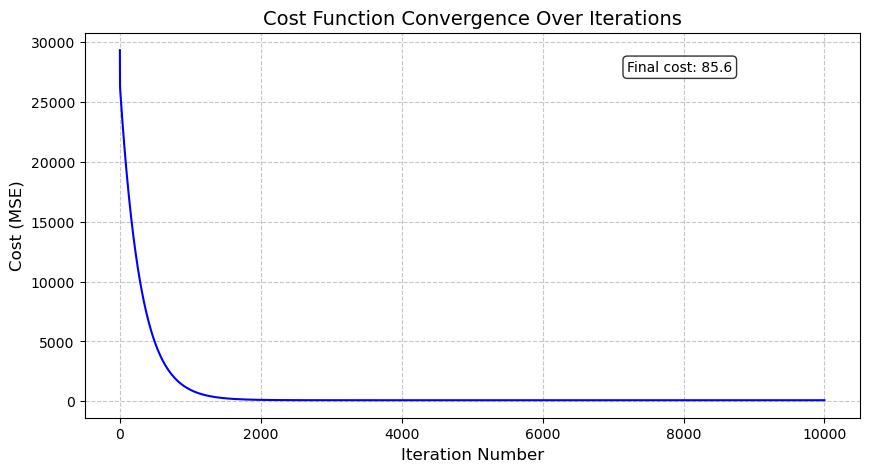

In [9]:
# Visualize cost convergence
plt.figure(figsize=(10, 5))
plt.plot(range(iterations), history['cost'], color='blue')
plt.title('Cost Function Convergence Over Iterations', fontsize=14)
plt.xlabel('Iteration Number', fontsize=12)
plt.ylabel('Cost (MSE)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Add annotation showing final cost
plt.annotate(f'Final cost: {history["cost"][-1]:.1f}',
             xy=(0.7, 0.9), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8))

plt.show()

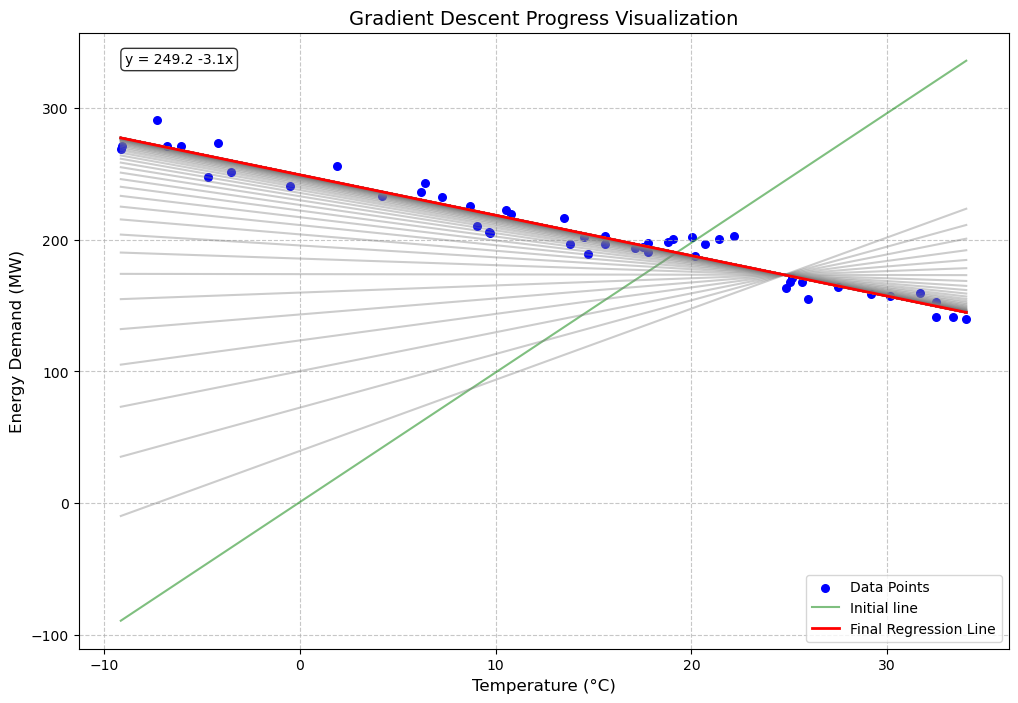

Results after 10000 iterations:
Intercept (β₀): 249.25
Slope (β₁): -3.07
Cost value: 85.6


In [10]:
# 4.2 Visualize model convergence by plotting intermediate lines
plt.figure(figsize=(12, 8))

# Plot original data points
plt.scatter(temperature, energy_demand, s=30, color='blue', label='Data Points')

# Plot intermediate lines (every 100 iterations)
step_size = 100  # Plot line every 100 iterations for visibility
for i in range(0, iterations, step_size):
    intercept_i, slope_i = history['intercept'][i], history['slope'][i]

    # Create x-values spanning the temperature range
    x_range = np.array([temperature.min(), temperature.max()])

    # Plot the intermediate line with low opacity
    if i == 0:
        plt.plot(x_range, predict(x_range, intercept_i, slope_i),
                 color='green', alpha=0.5, label='Initial line')
    else:
        plt.plot(x_range, predict(x_range, intercept_i, slope_i),
                 color='gray', alpha=0.4)

# Plot final regression line
plt.plot(x_range, predict(x_range, intercept, slope),
         color='red', linewidth=2, label='Final Regression Line')

# Add equation of the line as text
equation = f'y = {intercept:.1f} {slope:.1f}x'
plt.annotate(equation, xy=(0.05, 0.95), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8))

plt.title('Gradient Descent Progress Visualization', fontsize=14)
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Energy Demand (MW)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Print the final parameters and cost
print(f"Results after {iterations} iterations:")
print(f"Intercept (β₀): {intercept:.2f}")
print(f"Slope (β₁): {slope:.2f}")
print(f"Cost value: {history['cost'][-1]:.1f}")

### Check Your Results — Gradient Descent on Synthetic Dataset

If you've implemented `gradient_descent()` correctly and used the provided synthetic temperature–demand dataset, your results should be **close to the following**:

**Expected Output:**

```

Results after 10000 iterations using learning rate 0.002:
Intercept (β₀): 249.25
Slope (β₁): -3.07
Cost value: 85.6

```

This corresponds to the underlying true relationship:

> **energy_demand ≈ 250 - 3 × temperature**

Your **cost should decrease smoothly** over iterations, and the final **regression line** should fit the data well.

**If your results are far off:**
- Check that you're using the **correct gradient formulas** (especially the signs!).
- Try reducing the **learning rate** if the cost oscillates or increases.
- Print intermediate values to debug the update loop.

---

You’re on the right track if your values are **close** to the expected ones. Don’t worry if they’re not exact — convergence may vary slightly depending on learning rate and numerical precision.


---

## 5. Day-Ahead Market Example

In this section, we'll apply our gradient descent implementation to a real-world energy market dataset for Germany from the year 2024. First, let's understand how to load the data.

**About the Dataset**

The day-ahead electricity market data used in this exercise is sourced from the **[SMARD.de](https://www.smard.de/home)** platform — the official transparency portal of the German electricity market operated by the Bundesnetzagentur.

SMARD provides free access to a wide range of real-time and historical data including:

- Electricity generation by source,
- Day-ahead and intraday market prices,
- Load forecasts and actual consumption,
- Cross-border electricity flows.

You are encouraged to explore this portal for additional datasets, either for your own projects or to extend this analysis.


### 5.1 Loading Data with Pandas

Pandas is a data manipulation library in Python. Here's how to load CSV files using pandas:

- `pd.read_csv()`: Loads data from a CSV file into a pandas DataFrame
- `parse_dates`: Specifies which columns should be parsed as datetime objects
- `index_col`: Specifies which column should be used as the DataFrame's index

In our case, the first column contains the date and time, and we want to parse it as a datetime object.

**This cell will create an `inputs/` folder (if it doesn't already exist) and then download the `market_data_2024.csv` file from the GitHub repository into that folder.**

In [ ]:
# 1) Create the 'inputs' folder if it doesn't exist
os.makedirs('inputs', exist_ok=True)

# 2) Define the URL to the raw CSV on GitHub and the local path
url = 'https://raw.githubusercontent.com/nick-harder/AIES/main/lecture7/data/market_data_2024.csv'
local_path = 'inputs/market_data_2024.csv'

# 3) Download the file only if it's not already present
if not os.path.exists(local_path):
    print(f"Downloading data from {url} ...")
    urllib.request.urlretrieve(url, local_path)
    print("Download complete.")
else:
    print("File already exists, skipping download.")

Full dataset preview:


,DA Price,Demand,Solar,Wind Onshore,Wind Offshore,Hydro,Biomass,Lignite,Hard coal,Gas,Oil,Other fossil,Other VRE,Storage discharge,Storage charge
Time,,,,,,,,,,,,,,,
2024-01-01 00:00:00,0.10,37911.25,0.0,29614.75,5343.25,1798.50,4571.25,3372.75,1854.75,2662.00,398.00,721.25,93.00,0.0,-2488.75
2024-01-01 01:00:00,0.01,37104.75,0.0,29643.00,5187.25,1821.75,4528.75,3373.50,1828.75,2689.50,398.00,713.75,93.00,0.0,-3260.00
2024-01-01 02:00:00,0.00,36199.50,0.0,29215.25,4673.50,1828.75,4467.00,3393.00,1817.50,2711.50,397.50,724.75,93.00,0.0,-3416.75
2024-01-01 03:00:00,-0.01,35549.75,0.0,29284.00,4438.50,1856.25,4427.50,3393.75,1832.75,2694.25,397.75,715.25,94.75,0.0,-4107.50
2024-01-01 04:00:00,-0.03,35882.25,0.0,29210.50,4623.00,1857.25,4423.75,3399.25,1831.50,2725.50,398.00,713.50,96.00,0.0,-3923.00



Selected month (June 2024) data shape: (720, 15)


,DA Price,Demand,Solar,Wind Onshore,Wind Offshore,Hydro,Biomass,Lignite,Hard coal,Gas,Oil,Other fossil,Other VRE,Storage discharge,Storage charge
Time,,,,,,,,,,,,,,,
2024-06-01 00:00:00,88.82,38391.75,0.00,7339.75,3865.75,2071.25,4318.00,5546.75,343.75,3331.75,375.00,735.75,90.0,0.0,-207.00
2024-06-01 01:00:00,79.66,37815.25,0.00,7732.00,3630.25,2086.00,4238.00,4861.50,342.50,3242.00,374.50,732.50,90.0,0.0,-443.50
2024-06-01 02:00:00,72.14,37595.00,4.00,7808.50,3433.75,2005.25,4333.75,4796.00,342.25,3250.25,374.50,726.50,88.0,0.0,-258.25
2024-06-01 03:00:00,71.87,37873.25,310.75,7853.00,3514.75,2010.00,4353.50,5034.25,344.50,3131.00,374.25,717.50,86.0,0.0,-521.75
2024-06-01 04:00:00,71.83,39344.50,1617.00,7397.25,3518.50,2092.75,4414.75,5084.75,350.75,3132.25,374.25,716.00,86.0,103.5,-97.00



Data statistics:
Number of data points: 720
Demand range: 34750.8 to 66601.0 MW
Price range: -80.01 to 235.52 €/MWh


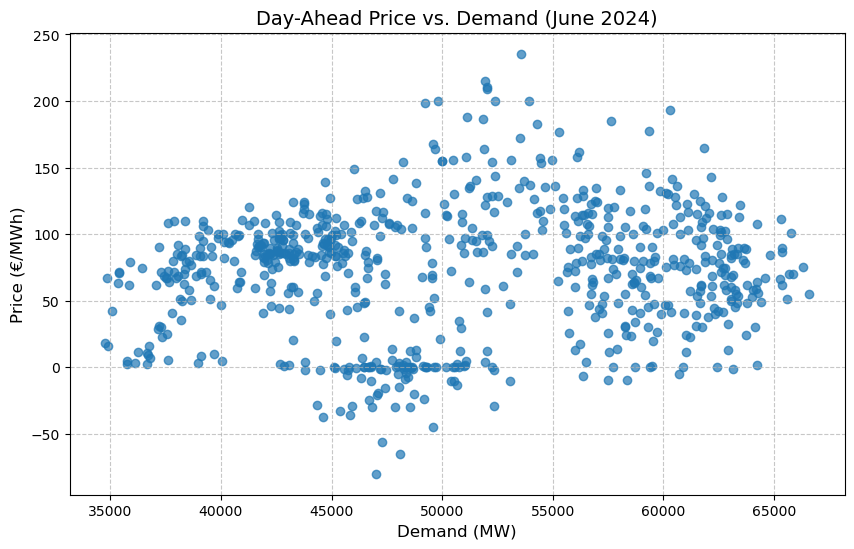

In [11]:
# Load the day-ahead market data
# - index_col='date': Sets the 'date' column as the index of the DataFrame
# - parse_dates=True: Converts date strings to datetime objects
df_full = pd.read_csv('inputs/market_data_2024.csv', index_col=0, parse_dates=True)

# Display the first few rows to understand the data structure
print("Full dataset preview:")
display(df_full.head())

# Select only one month (June 2024) for simplicity
df = df_full.loc['2024-06'].copy()

print(f"\nSelected month (June 2024) data shape: {df.shape}")
display(df.head())

# Extract features and target
demand = df['Demand'].values  # Feature (X)
price = df['DA Price'].values    # Target (Y)

# Basic statistics
print(f"\nData statistics:")
print(f"Number of data points: {len(demand)}")
print(f"Demand range: {demand.min():.1f} to {demand.max():.1f} MW")
print(f"Price range: {price.min():.2f} to {price.max():.2f} €/MWh")

# Visualize the relationship between demand and price
plt.figure(figsize=(10, 6))
plt.scatter(demand, price, alpha=0.7)
plt.title('Day-Ahead Price vs. Demand (June 2024)', fontsize=14)
plt.xlabel('Demand (MW)', fontsize=12)
plt.ylabel('Price (€/MWh)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### 5.2 Applying Gradient Descent to Raw Energy Market Data

In this section, we apply our gradient descent implementation to a real-world energy market dataset. We will first use raw data to observe the performance of our model. 

#### Exercise 2: Run Gradient Descent on Raw Data

In the cell below, run your `gradient_descent` on the **raw** `demand` and `price` arrays **without** any normalization.  
Observe what happens to the cost curve—does it converge, oscillate, or diverge?

**Note**: If the cost increases or becomes `NaN`, this indicates that the learning rate is too high. This is excpected at this point in the notebook.


/var/folders/ck/0m6299c93kd95nnbzxsb67v00000gn/T/ipykernel_72438/1273325448.py:30: RuntimeWarning: overflow encountered in square
  squared_errors = (y_true - y_pred)**2  # Calculate squared errors
/var/folders/ck/0m6299c93kd95nnbzxsb67v00000gn/T/ipykernel_72438/4070488386.py:8: RuntimeWarning: overflow encountered in multiply
  grad_slope = -2/m * np.sum(error * X)
/var/folders/ck/0m6299c93kd95nnbzxsb67v00000gn/T/ipykernel_72438/4070488386.py:23: RuntimeWarning: invalid value encountered in scalar subtract
  slope -= learning_rate * grad_slope


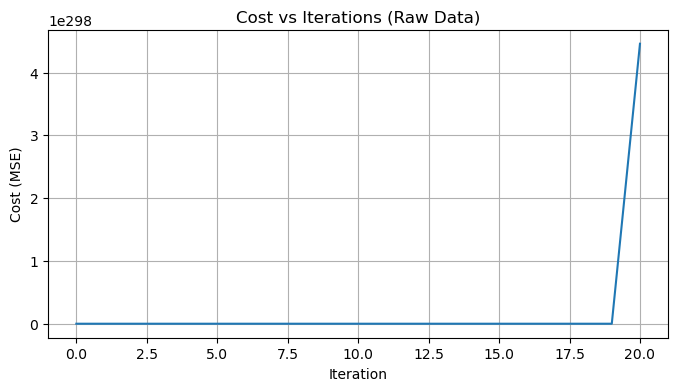

Final cost: nan
Intercept: nan, Slope: nan


In [12]:
# Hyperparameters (you may need to tweak these to try to force convergence)
learning_rate = 0.002
iterations = 10000

# --- YOUR CODE HERE ---
# Run gradient descent on raw (unnormalized) data
intercept_raw, slope_raw, history_raw = gradient_descent(demand, price, learning_rate, iterations)

# Plot cost over iterations
plt.figure(figsize=(8,4))
plt.plot(history_raw['cost'])
plt.title('Cost vs Iterations (Raw Data)')
plt.xlabel('Iteration')
plt.ylabel('Cost (MSE)')
plt.grid(True)
plt.show()

print(f"Final cost: {history_raw['cost'][-1]:.2e}")
print(f"Intercept: {intercept_raw:.4f}, Slope: {slope_raw:.6f}")


> **Questions for Exercise 2:**  
> 1. Does the cost decrease smoothly?  
> 2. If not, why might gradient descent be failing here?

### 5.3 Applying Gradient Descent to Normalized Data

As we saw in the previous section, using the raw data resulted in a failure of our gradient descent implementation. The algorithm either diverged or failed to converge due to unstable updates.

#### Why Did This Happen?

Gradient descent updates each parameter based on the slope (gradient) of the cost function. For the slope parameter $\beta_1$, the update rule is:

$$
\beta_1 \leftarrow \beta_1 - \alpha \left( -\frac{2}{m} \sum_{i=1}^m \left(y^{(i)} - (\beta_0 + \beta_1 x^{(i)})\right) \cdot x^{(i)} \right)
$$

If the feature values $x$ are large in magnitude (e.g., demand measured in thousands of MW), the gradients become large as well. This requires using a very small learning rate $\alpha$ to prevent the updates from overshooting the minimum.

Without normalization, the optimizer may:
- Overshoot or diverge,
- Zigzag inefficiently,
- Converge very slowly or not at all.


> What you see on the following plot is the cost surface resulting from applying linear regression to raw (unnormalized) demand and price data. The surface appears extremely stretched and narrow, especially along the slope $\beta_1$ axis—this shape illustrates why gradient descent struggles in this setting.
>
> This instability is caused by the **unequal scaling** between input features and target values, which distorts the shape of the optimization landscape.

---

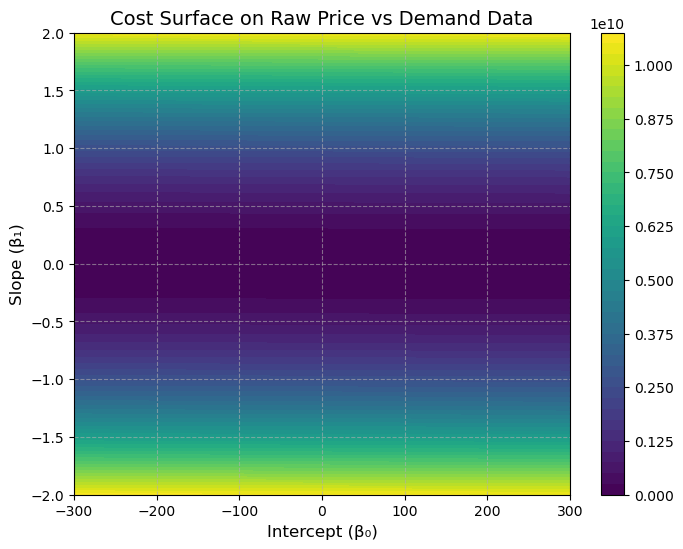

Demand range: 34750.8 MW to 66601.0 MW
Price range: -80.01 €/MWh to 235.52 €/MWh


In [13]:
# Visualizing Cost Surface on Raw Price-Demand Data

# Use June 2024 data loaded earlier
X = demand  # Feature
y = price   # Target

# Define parameter ranges for intercept and slope
b0_range = np.linspace(-300, 300, 100)
b1_range = np.linspace(-2, 2, 100)

# Mesh grid for parameter space
B0, B1 = np.meshgrid(b0_range, b1_range)
cost_surface = np.zeros_like(B0)

# Compute MSE for each (β₀, β₁) combination
for i in range(B0.shape[0]):
    for j in range(B0.shape[1]):
        y_pred = B0[i, j] + B1[i, j] * X
        cost_surface[i, j] = np.mean((y - y_pred) ** 2)

# Plot the cost surface as a contour plot
plt.figure(figsize=(8, 6))
cp = plt.contourf(B0, B1, cost_surface, levels=50, cmap='viridis')
plt.colorbar(cp)
plt.title("Cost Surface on Raw Price vs Demand Data", fontsize=14)
plt.xlabel("Intercept (β₀)", fontsize=12)
plt.ylabel("Slope (β₁)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Inspect data scale
print(f"Demand range: {X.min():.1f} MW to {X.max():.1f} MW")
print(f"Price range: {y.min():.2f} €/MWh to {y.max():.2f} €/MWh")


#### Z-score Normalization

To address this, we apply **z-score normalization** to the input and target data.

Given a feature vector $x = [x^{(1)}, x^{(2)}, \dots, x^{(n)}]$, the **z-score normalized** version $x'$ is defined as:

$$
x'^{(i)} = \frac{x^{(i)} - \mu_x}{\sigma_x}
\quad \text{for each } i = 1, \dots, n
$$

Where:

- $\mu_x$ is the **mean** of the feature:
  $$
  \mu_x = \frac{1}{n} \sum_{i=1}^n x^{(i)}
  $$

- $\sigma_x$ is the **standard deviation**:
  $$
  \sigma_x = \sqrt{\frac{1}{n} \sum_{i=1}^n (x^{(i)} - \mu_x)^2}
  $$

This method rescales all features to have mean 0 and standard deviation 1, transforming the optimization surface into a more balanced (spherical) shape. As a result:

- Gradient descent converges faster  
- Parameter updates remain stable  
- The risk of exploding gradients is significantly reduced  

Normalized inputs are also beneficial in many other machine learning models, such as k-NN, SVMs, and neural networks.

---

#### Exercise 3: Implement Z-Score Normalization

Now apply normalization in practice:

1. Compute the means and standard deviations for both `demand` and `price`.
2. Normalize the data using the z-score formula.
3. Run gradient descent on the **normalized** data.
4. Denormalize the resulting model parameters to interpret them in the original units.
5. Use the fitted model to compute predicted prices and visualize your results.

Make sure to compare the convergence behavior and forecast quality with your previous run on unnormalized data.

In [14]:
# Step 1: Normalize demand and price
demand_mean = np.mean(demand)
demand_std = np.std(demand)
price_mean = np.mean(price)
price_std = np.std(price)

demand_normalized = (demand - demand_mean) / demand_std
price_normalized = (price - price_mean) / price_std

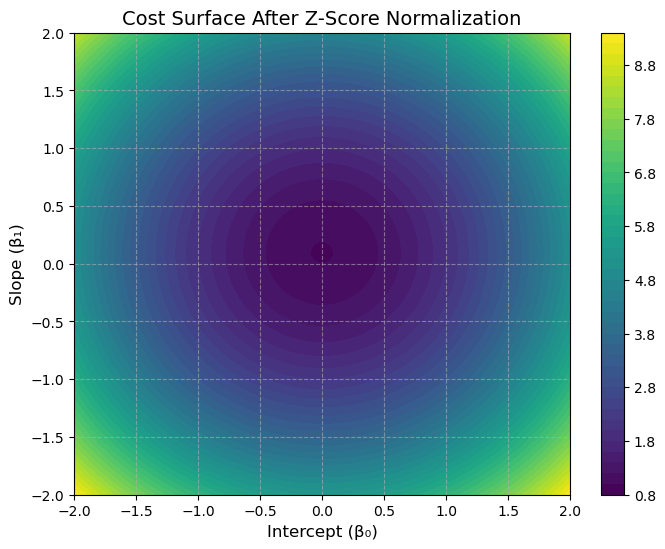

In [15]:
# Plot the cost surface again using normalized data
X_norm = demand_normalized
y_norm = price_normalized

b0_range = np.linspace(-2, 2, 100)
b1_range = np.linspace(-2, 2, 100)
B0, B1 = np.meshgrid(b0_range, b1_range)
cost_surface = np.zeros_like(B0)

# Step 3: Compute MSE across the parameter grid
for i in range(B0.shape[0]):
    for j in range(B0.shape[1]):
        y_pred = B0[i, j] + B1[i, j] * X_norm
        cost_surface[i, j] = np.mean((y_norm - y_pred) ** 2)

# Step 4: Plot the cost surface
plt.figure(figsize=(8, 6))
cp = plt.contourf(B0, B1, cost_surface, levels=50, cmap='viridis')
plt.colorbar(cp)
plt.title("Cost Surface After Z-Score Normalization", fontsize=14)
plt.xlabel("Intercept (β₀)", fontsize=12)
plt.ylabel("Slope (β₁)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

What you see on this plot is the cost surface after applying **Z-score normalization** to both the demand and price data.

In contrast to the stretched and narrow surface from the raw data, this plot shows a **symmetrical, bowl-shaped landscape**. The contours are nearly circular, indicating that the cost function changes at similar rates along both parameter axes (intercept and slope).

This balanced geometry confirms that **normalization has improved the conditioning of the optimization problem**. Gradient descent now takes consistent, stable steps toward the minimum and is far less likely to overshoot or diverge.

In short: this is the kind of landscape gradient descent is designed to perform well on — and why normalization is critical when working with real-world data that spans different scales.

---

Now that we have normalized our data, we can run gradient descent on the normalized demand and price data. The cost function should converge smoothly, and the fitted line should closely match the underlying relationship.

In [16]:
# Step 2: Run gradient descent
intercept, slope, history = gradient_descent(
    demand_normalized, price_normalized, learning_rate, iterations
)

# Step 3: Denormalize the model parameters to original scale
# If y = a*x + b in normalized space,
# Then in original space: price = a*(demand - mean_d)/std_d * std_p + b*std_p + mean_p
slope = slope * (price_std / demand_std)
intercept = price_std * intercept + price_mean - slope * demand_mean

# Step 4: calculate our predicted price
our_predicted_price = predicted_price = intercept + slope * demand

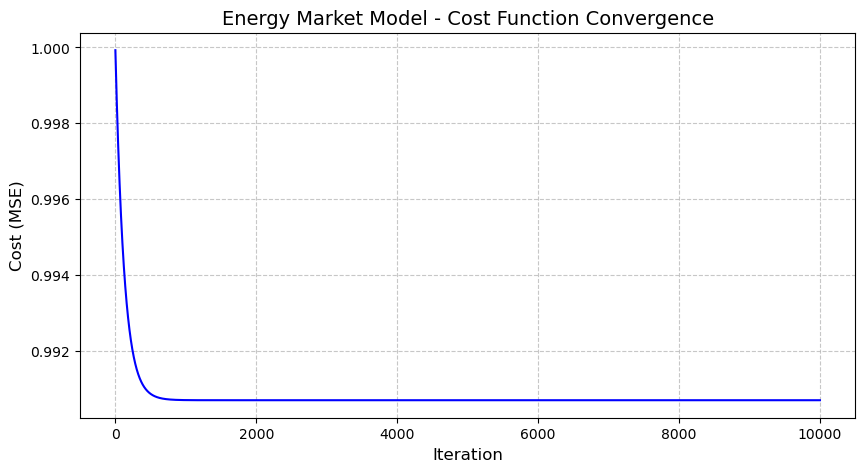

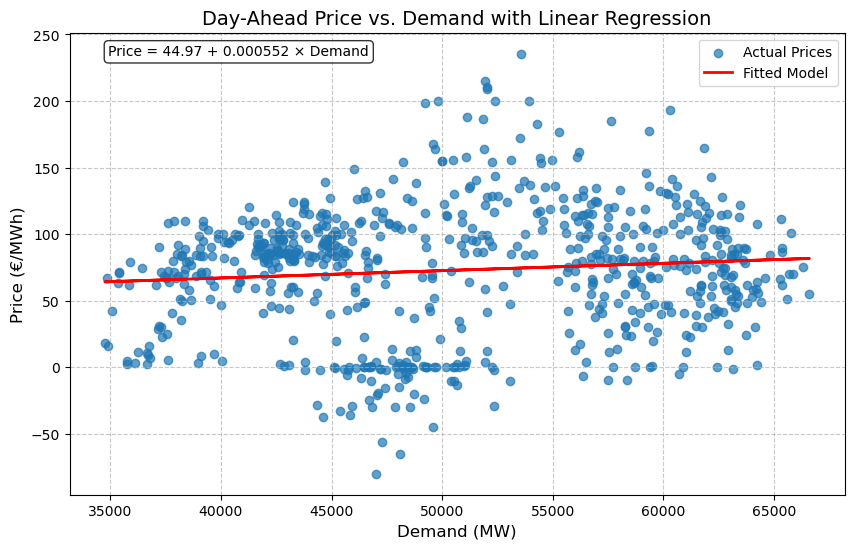

=== Final Model Results After Normalization ===
Linear regression parameters:
Intercept (β₀): 44.97
Slope (β₁): 0.000552
Final MSE: 0.99


In [17]:
# Plot the convergence of the cost function
plt.figure(figsize=(10, 5))
plt.plot(range(iterations), history['cost'], color='blue')
plt.title('Energy Market Model - Cost Function Convergence', fontsize=14)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Cost (MSE)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Plot the fitted line using original scale
plt.figure(figsize=(10, 6))
plt.scatter(demand, price, alpha=0.7, label='Actual Prices')
plt.plot(demand, our_predicted_price, color='red', linewidth=2, label='Fitted Model')

# Display the equation and parameters
equation = f'Price = {intercept:.2f} + {slope:.6f} × Demand'
plt.annotate(equation, xy=(0.05, 0.95), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8))

# Plot formatting
plt.title('Day-Ahead Price vs. Demand with Linear Regression', fontsize=14)
plt.xlabel('Demand (MW)', fontsize=12)
plt.ylabel('Price (€/MWh)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# Print the results
print("=== Final Model Results After Normalization ===")
print(f"Linear regression parameters:")
print(f"Intercept (β₀): {intercept:.2f}")
print(f"Slope (β₁): {slope:.6f}")
print(f"Final MSE: {history['cost'][-1]:.2f}")


> **Questions for Exercise 3:**  
> 1. How did normalization affect convergence?  
> 2. In your own words, **why** is z-score normalization so helpful for gradient descent?

---

## 6. Using scikit-learn for Linear Regression

### 6.1 Introduction to scikit-learn (sklearn)

[scikit-learn](https://scikit-learn.org/) is one of the most popular machine learning libraries in Python. It provides simple and efficient tools for data analysis and modeling, including:

- **Classification**: SVM, nearest neighbors, random forest, etc.
- **Regression**: Linear regression, SVR, decision trees, etc.
- **Clustering**: K-means, DBSCAN, etc.
- **Dimensionality reduction**: PCA, feature selection, etc.
- **Model selection**: Grid search, cross-validation, metrics
- **Preprocessing**: Feature extraction, normalization, encoding

### 6.2 Installing scikit-learn

You can install scikit-learn using either pip or conda:

```bash
# Using pip
pip install scikit-learn

# Using conda
conda -c conda-forge scikit-learn
```

### 6.3 Linear Regression in scikit-learn

The `LinearRegression` class from scikit-learn:
- Implements ordinary least squares (OLS) linear regression
- Has a simple API: `fit()` and `predict()`
- Automatically calculates the optimal parameters
- Key parameters:
  - `fit_intercept`: Whether to calculate the intercept (default: True)
  - `normalize`: Whether to normalize features (deprecated in newer versions)
  - `copy_X`: Whether to copy or overwrite the X array (default: True)
  
Let's compare our gradient descent implementation with scikit-learn's implementation:

Parameter comparison:
Parameter  Our GD Model         sklearn Model        Difference
---------- -------------------- -------------------- ----------
Intercept              44.97209             44.97209    0.00000
Slope                   0.00055              0.00055    0.00000


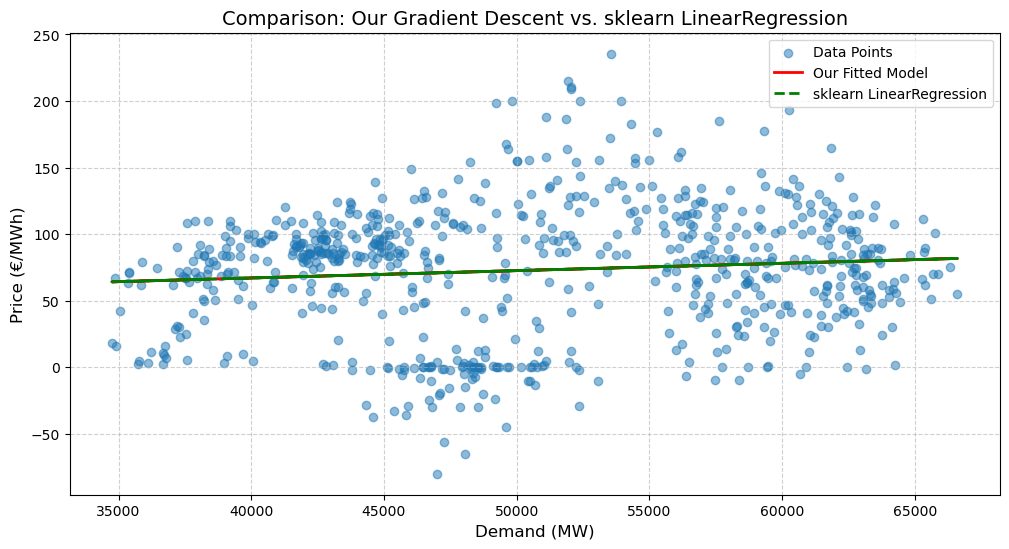

In [18]:
from sklearn.linear_model import LinearRegression

# Create a LinearRegression model instance
sklearn_model = LinearRegression()

# Fit the model to our data
# Note: sklearn expects X to be 2D array (reshape adds the second dimension)
sklearn_model.fit(demand.reshape(-1, 1), price)

# Generate predictions using sklearn model
sklearn_predicted_price = sklearn_model.predict(demand.reshape(-1, 1))

# Extract the learned parameters
sklearn_intercept = sklearn_model.intercept_
sklearn_slope = sklearn_model.coef_[0]

# Print the comparison between our GD implementation and sklearn
print("Parameter comparison:")
print(f"{'Parameter':<10} {'Our GD Model':<20} {'sklearn Model':<20} {'Difference':<10}")
print(f"{'-'*10:<10} {'-'*20:<20} {'-'*20:<20} {'-'*10:<10}")
print(f"{'Intercept':<10} {intercept:20.5f} {sklearn_intercept:20.5f} {abs(intercept-sklearn_intercept):10.5f}")
print(f"{'Slope':<10} {slope:20.5f} {sklearn_slope:20.5f} {abs(slope-sklearn_slope):10.5f}")

# Plot both models for visual comparison
plt.figure(figsize=(12, 6))
plt.scatter(demand, price, alpha=0.5, label='Data Points')

# Plot our GD model prediction
plt.plot(demand, our_predicted_price, color='red', linewidth=2, label='Our Fitted Model')

# Plot sklearn model prediction
plt.plot(demand, sklearn_predicted_price,
         color='green', linewidth=2, linestyle='--', label='sklearn LinearRegression')

plt.title('Comparison: Our Gradient Descent vs. sklearn LinearRegression', fontsize=14)
plt.xlabel('Demand (MW)', fontsize=12)
plt.ylabel('Price (€/MWh)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

## 7. Performance Metrics: MAE & RMSE

When evaluating regression models, we need appropriate metrics. Let's explore two common metrics:

### 7.1 Mean Absolute Error (MAE)

MAE measures the average magnitude of errors without considering their direction.

**Mathematical definition**:
$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y^{(i)} - \hat{y}^{(i)}|
$$

Where:
- $y^{(i)}$ is the actual value
- $\hat{y}^{(i)}$ is the predicted value
- $n$ is the number of observations

**Interpretation**:
- MAE represents the average absolute deviation between predicted and actual values
- It's in the same units as the target variable (e.g., €/MWh for price)
- MAE treats all errors with equal weight (linear penalty)

### 7.2 Root Mean Squared Error (RMSE)

RMSE is the square root of the average of squared differences between predicted and actual values.

**Mathematical definition**:
$$
\text{RMSE} = \sqrt{\frac{1}{n}\sum_{i=1}^{n} (y^{(i)} - \hat{y}^{(i)})^2}
$$

**Interpretation**:
- Like MAE, RMSE is in the same units as the target variable
- RMSE penalizes large errors more heavily (quadratic penalty)
- RMSE is always greater than or equal to MAE
- A larger gap between RMSE and MAE indicates greater variance in the errors

### 7.3 Key Differences

- **Sensitivity to outliers**: RMSE is more sensitive to outliers due to the squared term
- **Interpretability**: MAE is often easier to interpret directly
- **Mathematical properties**: RMSE has better mathematical properties for optimization

Let's calculate and compare these metrics for our models:

Performance Metrics Comparison:
Model                MAE        RMSE      
-------------------- ---------- ----------
Our Gradient Descent      37.65      47.49
sklearn Linear Reg.       37.65      47.49


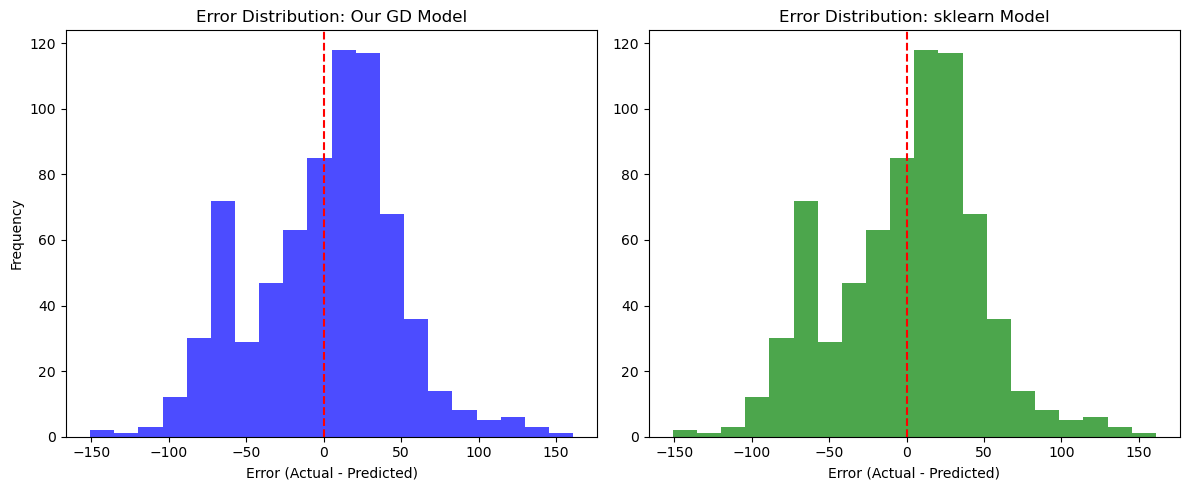

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE for both models
mae_gd = mean_absolute_error(price, our_predicted_price)
mae_sklearn = mean_absolute_error(price, sklearn_predicted_price)

# Calculate RMSE for both models
rmse_gd = np.sqrt(mean_squared_error(price, our_predicted_price))
rmse_sklearn = np.sqrt(mean_squared_error(price, sklearn_predicted_price))

# Print results in a formatted table
print("Performance Metrics Comparison:")
print(f"{'Model':<20} {'MAE':<10} {'RMSE':<10}")
print(f"{'-'*20:<20} {'-'*10:<10} {'-'*10:<10}")
print(f"{'Our Gradient Descent':<20} {mae_gd:10.2f} {rmse_gd:10.2f}")
print(f"{'sklearn Linear Reg.':<20} {mae_sklearn:10.2f} {rmse_sklearn:10.2f}")

# Plot the error distributions
plt.figure(figsize=(12, 5))

# Setup a 1x2 subplot grid
plt.subplot(1, 2, 1)
plt.hist(price - our_predicted_price, bins=20, alpha=0.7, color='blue')
plt.axvline(0, color='red', linestyle='--')
plt.title('Error Distribution: Our GD Model', fontsize=12)
plt.xlabel('Error (Actual - Predicted)', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

plt.subplot(1, 2, 2)
plt.hist(price - sklearn_predicted_price, bins=20, alpha=0.7, color='green')
plt.axvline(0, color='red', linestyle='--')
plt.title('Error Distribution: sklearn Model', fontsize=12)
plt.xlabel('Error (Actual - Predicted)', fontsize=10)

plt.tight_layout()
plt.show()

## 8. Multiple Linear Regression

So far, we've worked with simple linear regression using a single feature. In practice, we often have multiple features that can help predict our target variable.

### 8.1 Multiple Linear Regression Theory

**Model Equation**:
$$
\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_p x_p
$$

Where:
- $\hat{y} $ is the predicted value
- $\beta_0$ is the intercept
- $\beta_1, \beta_2, ..., \beta_p$ are coefficients for each feature
- $x_1, x_2, ..., x_p$ are the feature values

In matrix notation, this becomes:
$$
\hat{\mathbf{y}} = \mathbf{X}\boldsymbol{\beta}
$$

Where:
- $\hat{\mathbf{y}}$ is the vector of predictions
- $\mathbf{X}$ is the feature matrix (including a column of 1s for the intercept)
- $\boldsymbol{\beta}$ is the vector of coefficients

### 8.2 Using scikit-learn for Multiple Linear Regression

The `LinearRegression` class in scikit-learn handles multiple features automatically. We just need to provide a feature matrix X where each column represents a different feature.

**Key Points**:
- Feature matrix X should have shape (n_samples, n_features)
- Target vector y should have shape (n_samples,)
- After fitting, the coefficients are available in the `coef_` attribute as an array
- The intercept is available in the `intercept_` attribute

### Exercise 4: Multiple Linear Regression for Energy Price Prediction

**Task**: Create a multiple linear regression model to predict day-ahead energy prices using additional features from the dataset.

**Steps**:
1. Identify at least 2 additional features (besides demand) that might influence energy prices
2. Prepare a feature matrix X with these features
3. Train a multiple linear regression model using scikit-learn
4. Calculate and report the MAE and RMSE
5. Compare the performance with the single-feature model
6. Interpret the coefficients of your model

**Note**: Features you might consider include time-based features (hour of day, day of week), weather data, or other columns in the dataset.

> **Note**: The following steps are provided as suggestions for the flow of the exercise. You can also implement the steps in this notebook. However, it is highly recommended to do the actual implementation in a Python file on your local machine for better practice and debugging experience.

> **Reminder**: To install `scikit-learn` using `conda`, you can use the following command:
> ```bash
> conda -c conda-forge scikit-learn
> ```

Available columns in the dataset:
['DA Price', 'Demand', 'Solar', 'Wind Onshore', 'Wind Offshore', 'Hydro', 'Biomass', 'Lignite', 'Hard coal', 'Gas', 'Oil', 'Other fossil', 'Other VRE', 'Storage discharge', 'Storage charge']
Intercept: 63.8659
Coefficients:
Demand: 0.0018
Solar: -0.0021
Wind Onshore: -0.0021
Wind Offshore: -0.0022
Hydro: 0.0050
Biomass: -0.0165
Lignite: -0.0013
Hard coal: -0.0011
Gas: 0.0051
Oil: 0.0449
Other fossil: 0.0280
Other VRE: -0.2290
Storage discharge: 0.0021
Storage charge: 0.0022
MAE: 19.05
RMSE: 26.53

Single-feature model comparison:
MAE: 32.71
RMSE: 45.03


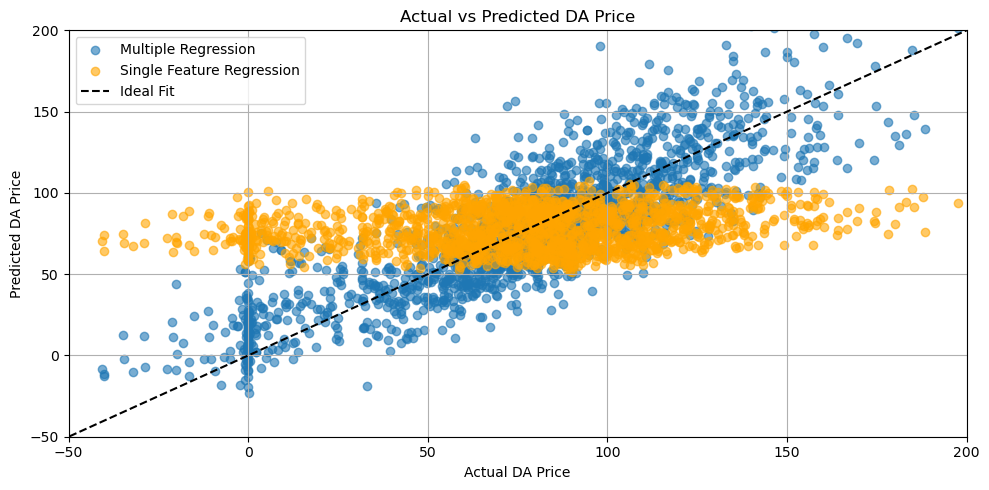

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Step 1: Load the dataset and identify features you want to use
print("Available columns in the dataset:")
print(df_full.columns.tolist())

# Select relevant features for the model
features = df_full.columns.to_list()
features.remove('DA Price')  # Remove target variable from features
X_multi = df_full[features].values
price = df_full['DA Price'].values

# Step 2: Train a multiple linear regression model
X_train, X_test, y_train, y_test = train_test_split(X_multi, price, test_size=0.2, random_state=42)

multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

# Extract and print the coefficients and intercept
print(f"Intercept: {multi_model.intercept_:.4f}")
print("Coefficients:")
for feature, coef in zip(features, multi_model.coef_):
    print(f"{feature}: {coef:.4f}")

# Step 3: Evaluate the multiple regression model
predictions = multi_model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# Optional: Compare with single-feature model
# Assuming demand was the only feature in a previous model
X_single = df_full[['Demand']].values
X_train_single, X_test_single, y_train_single, y_test_single = train_test_split(X_single, price, test_size=0.2, random_state=42)

single_model = LinearRegression()
single_model.fit(X_train_single, y_train_single)
single_predictions = single_model.predict(X_test_single)
single_mae = mean_absolute_error(y_test_single, single_predictions)
single_rmse = np.sqrt(mean_squared_error(y_test_single, single_predictions))

print("\nSingle-feature model comparison:")
print(f"MAE: {single_mae:.2f}")
print(f"RMSE: {single_rmse:.2f}")

# Step 4: Visualize the results
plt.figure(figsize=(10, 5))
plt.scatter(y_test, predictions, alpha=0.6, label='Multiple Regression')
plt.scatter(y_test_single, single_predictions, alpha=0.6, label='Single Feature Regression', color='orange')
plt.plot([min(price), max(price)], [min(price), max(price)], '--k', label='Ideal Fit')
plt.xlabel("Actual DA Price")
plt.ylabel("Predicted DA Price")
plt.title("Actual vs Predicted DA Price")
plt.legend()
plt.grid(True)
plt.xlim(-50, 200)
plt.ylim(-50, 200)
plt.tight_layout()
plt.show()

## Conclusion

Congratulations on completing this notebook!

You’ve now walked through—and hands-on—every step of building, debugging, and evaluating a simple linear regression model:

* **Why and how gradient descent works**: you derived the update rules and saw how the choice of learning rate shapes convergence.
* **The importance of feature scaling**: by first running on raw data, you observed divergence; then, after implementing z-score normalization yourself, you achieved smooth, reliable convergence.
* **Real-world application**: you applied your code to day-ahead electricity market data, learned how to denormalize parameters, and visualized the fitted model against actual prices.
* **Comparisons and metrics**: you contrasted your implementation with scikit-learn’s OLS solution and used MAE vs. RMSE to understand different error perspectives.
* **Growth to multiple regression**: you’re now set up to include extra features to capture more complex patterns.

---

### Reflect Before You Leave

- What did you learn about the role of feature scaling in ML?
- What were the strengths and weaknesses of your gradient descent implementation?
- Could this model be improved with non-linear features or domain-specific constraints?

Write 3–5 bullet points summarizing your insights.